Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3720 - loss: 1.7300 - val_accuracy: 0.5648 - val_loss: 1.2294
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.5974 - loss: 1.1484 - val_accuracy: 0.6310 - val_loss: 1.0626
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6521 - loss: 1.0000 - val_accuracy: 0.6523 - val_loss: 1.0034
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6878 - loss: 0.9058 - val_accuracy: 0.6632 - val_loss: 0.9745
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.7027 - loss: 0.8526 - val_accuracy: 0.6919 - val_loss: 0.9104
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.7293 - loss: 0.7832 - val_accuracy: 0.6882 - val_loss: 0.9097
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7464 - loss: 0.7342 - val_accuracy: 0.6815 - val_loss: 0.9542
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7559 -

Saving cat_photo.jpg to cat_photo (1).jpg


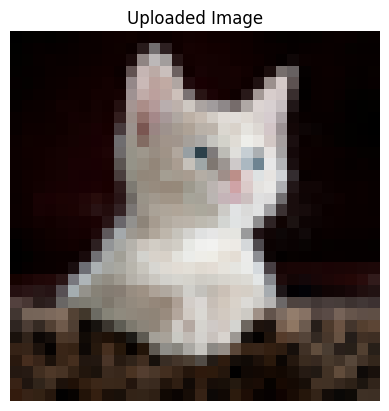

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
🔍 Prediction: cat
📊 Confidence: 0.82


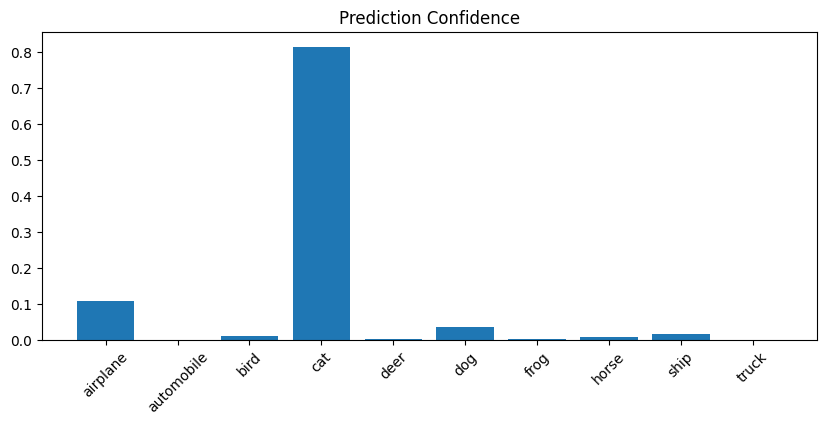

In [5]:
# 📌 Step 1: Install dependencies
!pip install tensorflow pillow matplotlib

# 📌 Step 2: Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# 📌 Step 3: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck','Human']

# 📌 Step 4: Define and train CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 📌 Step 5: Save model
model.save("cifar10_model.h5")
# Optional: download (works best in Chrome)
# files.download("cifar10_model.h5")

# 📌 Step 6: Upload and classify custom image
uploaded = files.upload()

for fn in uploaded.keys():
    try:
        img = Image.open(fn).convert('RGB').resize((32, 32))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Uploaded Image")
        plt.show()

        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 32, 32, 3)

        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]
        confidence = np.max(predictions)

        print(f"🔍 Prediction: {predicted_class}")
        print(f"📊 Confidence: {confidence:.2f}")

        # Optional: Show bar chart
        plt.figure(figsize=(10,4))
        plt.bar(class_names, predictions[0])
        plt.xticks(rotation=45)
        plt.title("Prediction Confidence")
        plt.show()

    except Exception as e:
        print(f"❌ Error processing image: {e}")


In [ ]:
!pip install tensorflow.keras

In [ ]:
import os
print(os.path.exists("cifar10_model.h5"))


True


In [6]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.1 MB/s eta 0:00:00


In [7]:
%%writefile streamlit_app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 📌 Load CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 📌 Load trained model
model = tf.keras.models.load_model("cifar10_model.h5")

# 🎨 Streamlit UI
st.title("CIFAR-10 Image Classifier 🚀")
st.write("Upload an image and the CNN model will predict its class.")

# 📤 Upload image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg","jpeg","png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert('RGB').resize((32, 32))
    st.image(img, caption="Uploaded Image", use_container_width=True)

    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 32, 32, 3)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    st.subheader(f"🔍 Prediction: {predicted_class}")
    st.write(f"📊 Confidence: {confidence:.2f}")

    # 📊 Bar chart
    st.bar_chart(predictions[0])


Writing streamlit_app.py


In [9]:
!ngrok config add-authtoken 2zPsyvEgfyCsMA10TOBi0dPDRfW_XNVXjsxsgjskLFQdU9kv


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [10]:
from pyngrok import ngrok
!streamlit run streamlit_app.py &>/dev/null&

# Get public URL
url = ngrok.connect(8501)
print("Streamlit App URL:", url)


Streamlit App URL: NgrokTunnel: "https://1bb9850a3f01.ngrok-free.app" -> "http://localhost:8501"
